In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# reading the file 
df = pd.read_csv('TSLA.CSV', parse_dates=True, index_col='Date')

In [3]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 758 entries, 2019-05-21 to 2022-05-20
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          758 non-null    float64
 1   High          758 non-null    float64
 2   Low           758 non-null    float64
 3   Close         758 non-null    float64
 4   Volume        758 non-null    int64  
 5   Dividends     758 non-null    int64  
 6   Stock Splits  758 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 47.4 KB


<AxesSubplot: xlabel='Date'>

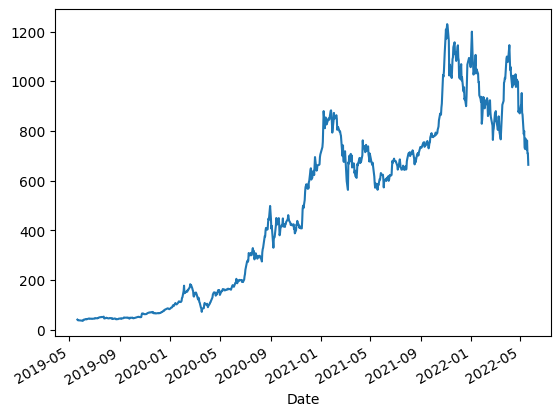

In [5]:
df['Close'].plot()

In [6]:
len(df)

758

In [7]:
df = df['Close']

In [8]:
df.reset_index(drop=True, inplace=True)
df.shape

# this is pandas series not data frame 

(758,)

In [9]:
df = pd.DataFrame(df)

In [13]:
df.shape

(758, 1)

# Train Test Split

In [16]:
train = df.iloc[:700]
test = df.iloc[700:]

# Performing scaling


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()